# 0184930-曾瑶-实验报告

## 爬取上市公司基本信息

1.导入可能用到的模块

In [103]:
import pdfplumber
import os
import json
import pandas as pd
from pandas import Series,DataFrame
import re
import matplotlib.pyplot as plt
%matplotlib inline

2.读取文件夹中所有pdf

In [106]:
import os
pdf_path = 'C:\\Users\\瑶\\Desktop\\2019年报 - 副本\\'
os.listdir(pdf_path)

['300081：2019年年度报告.pdf',
 '300161：2019年年度报告.pdf',
 '300169：2019年年度报告.pdf',
 '300174：2019年年度报告.pdf',
 '300214：2019年年度报告.pdf',
 '300235：2019年年度报告.pdf',
 '300291：2019年年度报告.pdf',
 '300316：2019年年度报告.pdf',
 '300363：2019年年度报告.pdf',
 '300370：2019年年度报告.pdf',
 '300428：2019年年度报告.pdf',
 '300442：2019年年度报告.pdf',
 '300451：2019年年度报告.pdf',
 '300460：2019年年度报告.pdf',
 '300492：2019年年度报告.pdf',
 '300502：2019年年度报告.pdf',
 '300504：2019年年度报告.pdf',
 '300505：2019年年度报告.pdf',
 '300519：2019年年度报告.pdf',
 '300528：2019年年度报告.pdf',
 '300538：2019年年度报告.pdf',
 '300547：2019年年度报告.pdf',
 '300548：2019年年度报告.pdf',
 '300591：2019年年度报告.pdf',
 '300612：2019年年度报告.pdf',
 '300622：2019年年度报告.pdf',
 '300637：2019年年度报告.pdf',
 '300661：2019年年度报告.pdf',
 '300670：2019年年度报告.pdf',
 '300671：2019年年度报告.pdf',
 '300678：2019年年度报告.pdf',
 '300723：2019年年度报告.pdf',
 '300755：2019年年度报告.pdf',
 '300770：2019年年度报告.pdf',
 '300775：2019年年度报告.pdf',
 '300779：2019年年度报告.pdf',
 '300789：2019年年度报告.pdf',
 '300792：2019年年度报告.pdf',
 '300808：2019年年度报告.pdf']

3.提取上述PDF中上市公司基本信息和财务信息（包括股票简称、股票代码、公司的法定代表人、办公地址、公司网址、电子信箱、主要会计数据和财务指标以及最近三年经营活动产生的现金流量净额）

In [167]:
def gettable(fileName):
    with pdfplumber.open(fileName) as pdf:
        pageCount = len(pdf.pages)
        for i in range(1,pageCount):

            page = pdf.pages[i]

            pageText = page.extract_text()

            if pageText and "一、公司信息" in pageText:
                table1 = page.extract_table()

            elif pageText and "五、主要会计数据和财务指标" in pageText:
                table2 = page.extract_table()
                break
    # 返回公司信息表和主要会计数据和财务指标表
    return (table1,table2)


# 传入一个table数组
def extract(table1,table2):
    # 提取信息
    data = {
        "股票简称":'',
        "股票代码":'',
        "公司的法定代表人":'',
        "办公地址":'',
        "公司国际互联网网址":'',
        "电子信箱":'',
        "经营活动产生的现金流量净额": {
            2017:0,
            2018:0,
            2019:0
        }
    }
    keywords = ["股票简称","股票代码","公司的法定代表人","办公地址","公司国际互联网网址","电子信箱"]
    for line in table1:
        for key in keywords:
            if key in line:
                key_index = line.index(key)
                for t in range(key_index+1,len(line)):
                    if line[t]:
                        data[key] = line[t]
                        break

    # 处理table2
    for line in range(0,len(table2)):
            if table2[line][0] and "经营活动产生的现金流量净额" in table2[line][0]:
                if table2[line][1]:
                    data["经营活动产生的现金流量净额"]["2019"] = table2[line][1]
                    data["经营活动产生的现金流量净额"]["2018"] = table2[line][2]
                    data["经营活动产生的现金流量净额"]["2017"] = table2[line][4]
                else:
                    data["经营活动产生的现金流量净额"]["2019"] = table2[line+1][1]
                    data["经营活动产生的现金流量净额"]["2018"] = table2[line+1][2]
                    data["经营活动产生的现金流量净额"]["2017"] = table2[line+1][4]



    return data

dir = "C:\\Users\\瑶\\Desktop\\2019年报 - 副本\\"
\
file_list = os.listdir(dir)
data = []
for fileName in file_list:
    filePath = dir+fileName
    table1,table2 = getTable(filePath)
    result = extract(table1,table2)
    print(fileName)
    print(result)
    data.append(result)
# 写入到json文件
with open("result.json","w",encoding="utf-8") as file:
    json.dump(data,file,ensure_ascii=False)

300081：2019年年度报告.pdf
{'股票简称': '恒信东方', '股票代码': '300081', '公司的法定代表人': '孟宪民', '办公地址': '北京市海淀区蓝靛厂南路牛顿办公区北区11层', '公司国际互联网网址': 'http://www.hxgro.com/', '电子信箱': 'office@hxgro.com', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0}}
300161：2019年年度报告.pdf
{'股票简称': '华中数控', '股票代码': '300161', '公司的法定代表人': '陈吉红', '办公地址': '武汉市东湖开发区华工科技园', '公司国际互联网网址': 'www.huazhongcnc.com', '电子信箱': 'hcnc@hzncc.com', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0, '2019': '-7,706,529.47', '2018': '133,781,403.75', '2017': '-156,320,029.48'}}
300169：2019年年度报告.pdf
{'股票简称': '天晟新材', '股票代码': '300169', '公司的法定代表人': '吴海宙', '办公地址': '常州市龙锦路 号\n508', '公司国际互联网网址': 'http://www.tschina.com', '电子信箱': 'dongmi@tschina.com', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0, '2019': '-23,953,757.95', '2018': '7,445,143.22', '2017': '11,187,966.34'}}
300174：2019年年度报告.pdf
{'股票简称': '元力股份', '股票代码': '300174', '公司的法定代表人': '许文显', '办公地址': '福建省南平市陈坑至瓦口工业园区', '公司国际互联网网址': 'www.yuanlicarbon.com', '电子信箱': 'dm@yuanlicarbon.com', '经营活动产生的现金流量净额': {2017: 0, 2018: 0

300671：2019年年度报告.pdf
{'股票简称': '富满电子', '股票代码': '', '公司的法定代表人': '刘景裕', '办公地址': '深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼', '公司国际互联网网址': 'http://www.superchip.cn/', '电子信箱': 'zqb@superchip.cn', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0}}
300678：2019年年度报告.pdf
{'股票简称': '中科信息', '股票代码': '300678', '公司的法定代表人': '史志明', '办公地址': '四川省成都市人民南路四段9号', '公司国际互联网网址': 'http://www.casit.com.cn', '电子信箱': 'dsh@casit.com.cn', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0, '2019': '-4,971,602.19', '2018': '-12,732,925.39', '2017': '12,052,326.74'}}
300723：2019年年度报告.pdf
{'股票简称': '一品红', '股票代码': '300723', '公司的法定代表人': '李捍雄', '办公地址': '广州市天河区珠江新城金穗路星汇国际大厦西塔17层01单元', '公司国际互联网网址': 'www.gdyph.com', '电子信箱': 'zqb@gdyph.com', '经营活动产生的现金流量净额': {2017: 0, 2018: 0, 2019: 0, '2019': '280,649,860.14', '2018': '238,599,800.41', '2017': '158,419,971.36'}}
300755：2019年年度报告.pdf
{'股票简称': '华致酒行', '股票代码': '300755', '公司的法定代表人': '彭宇清', '办公地址': '北京市东城区白桥大街15号嘉禾国信大厦CD座5层', '公司国际互联网网址': 'www.vatsliquor.com', '电子信箱': 'dongmiban@vatsliquor.com', '经营活动产生的现金流量净

4.将上述提取的基本信息和财务信息以表格形式呈现

In [107]:
pd.DataFrame.from_dict(data)
df=pd.DataFrame.from_dict(data)
df

股票简称    股票代码       公司的法定代表人                                      办公地址  \
0   恒信东方  300081            孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161            陈吉红                             武汉市东湖开发区华工科技园   
2   天晟新材  300169            吴海宙                             常州市龙锦路 号\n508   
3   元力股份  300174            许文显                           福建省南平市陈坑至瓦口工业园区   
4   日科化学  300214            彭国锋                            山东省昌乐县英轩街3999号   
5   方直科技  300235            黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
6   华录百纳  300291             方刚                         北京市朝阳区安家楼50号院A7-2   
7   晶盛机电  300316            曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
8   博腾股份  300363            居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
9   安控科技  300370            许永良                           北京市海淀区地锦路9号院6号楼   
10  四通新材  300428            臧立国                            保定市清苑区发展西街359号   
11   普丽盛  300442            姜卫东                          上海市金山区张堰镇金张支路84号   
12  创业慧康  300451             葛航                  杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
13  惠伦晶体  300460            赵积清                         广东省东莞市黄江镇黄江东环路68号   
14  山鼎设计  300492             陈栗                    成都市锦江区东大街芷泉段6号1栋1单元37层   
15   新易盛  300502            高光荣                         成都市双流区公兴镇物联西街127号   
16  天邑股份  300504            李世宏                       四川省大邑县晋原镇雪山大道一段198号   
17   川金诺  300505             刘甍                      云南省昆明市呈贡区上海东盟大厦A座10楼   
18  新光药业  300519            王岳钧                         浙江省嵊州市剡湖街道环城西路25号   
19  幸福蓝海  300528            蒋小平                            南京市栖霞区元化路8号28幢   
20                                                                          
21  川环科技  300547            文谟统                             四川省达州市大竹县工业园区   
22  博创科技  300548    ZHU WEI(朱伟)                          浙江省嘉兴市南湖区亚太路306号   
23   万里马  300591            林大耀               广州市海珠区新港东路1028号保利世界贸易中心F座3层   
24  宣亚国际  300612             邬涛                       北京市朝阳区八里庄东里1号CN02-B   
25  博士眼镜  300622  ALEXANDER LIU          深圳市罗湖区深南东路5016号京基一百大厦A座2201-02单元   
26  扬帆新材  300637             樊彬                     浙江省杭州市滨江区信诚路31号扬帆大厦五楼   
27  圣邦股份  300661            张世龙                   北京市海淀区西三环北路87号13层3-1301   
28  大烨智能  300670             陈杰                            南京市江宁区将军大道223号   
29  富满电子                    刘景裕                 深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼   
30  中科信息  300678            史志明                            四川省成都市人民南路四段9号   
31   一品红  300723            李捍雄              广州市天河区珠江新城金穗路星汇国际大厦西塔17层01单元   
32  华致酒行  300755            彭宇清                  北京市东城区白桥大街15号嘉禾国信大厦CD座5层   
33  新媒股份  300770            林瑞军                        广州市人民北路686号自编25幢后座   
34  三角防务  300775            严建亚                             西安市航空基地蓝天二路8号   
35  惠城环保  300779            张新功                         青岛经济技术开发区淮河东路 57号   
36  唐源电气  300789             周艳                  成都市武侯区武兴五路355号西部智谷A1-1-9   
37  壹网壹创  300792            林振宇       浙江省杭州市经济技术开发区白杨街道科技园路2号2幢14层01-14单元   
38  久量股份  300808            卓楚光                       广州市白云区云城西路白云绿地中心27楼   

                          公司国际互联网网址                         电子信箱  \
0             http://www.hxgro.com/             office@hxgro.com   
1               www.huazhongcnc.com               hcnc@hzncc.com   
2            http://www.tschina.com           dongmi@tschina.com   
3              www.yuanlicarbon.com          dm@yuanlicarbon.com   
4           http://www.rikechem.com        rikechem@rikechem.com   
5                www.kingsunedu.com  kingsunsoft@kingsunsoft.com   
6               http://www.hlbn.cc/               hbndsh@hlbn.cc   
7               http://www.jsjd.cc/                 jsjd@jsjd.cc   
8              http://www.porton.cn          porton.db@porton.cn   
9                     www.etrol.com               info@etrol.com   
10           http://www.stnm.com.cn             info@stnm.com.cn   
11                   www.cn-pls.com               pls@cn-pls.com   
12        https://www.bsoft.com.cn/    

5.将最近三年经营活动产生的现金流量净额数据可视化

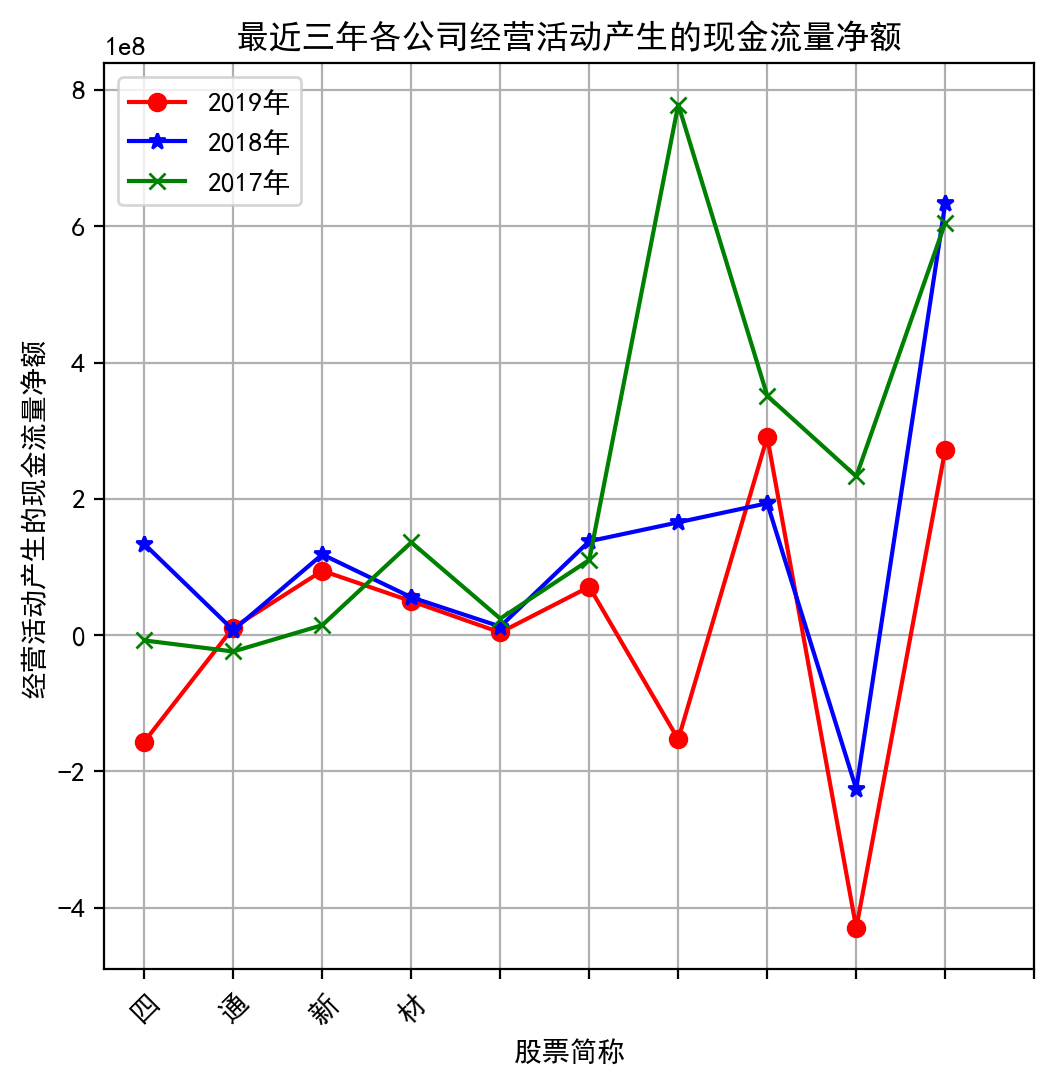

In [168]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

plt.rcParams['font.sans-serif']=['SimHei']  #确保显示中文
plt.rcParams['axes.unicode_minus'] = False  #确保显示负数的参数设置
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] =200

y1=[]
y2=[]
y3=[]
with open("result.json","r",encoding="utf-8") as file:
    d = json.load(file)
   
    for item in d[0:11]:
        if item['股票简称'] and item['经营活动产生的现金流量净额']['2017']:
            labels.append(item['股票简称'])
            y1.append(item['经营活动产生的现金流量净额']['2017'])
            y2.append(item['经营活动产生的现金流量净额']['2018'])
            y3.append(item['经营活动产生的现金流量净额']['2019'])
size = len(y1)

y1 = [float(i.replace(",","")) for i in y1]
y2 = [float(i.replace(",","")) for i in y2]
y3 = [float(i.replace(",","")) for i in y3]

plt.plot(y1,marker='o',c='r',label='2019年')
plt.plot(y2,marker='*',c='b',label='2018年')
plt.plot(y3,marker='x',c='g',label='2017年')
plt.legend(loc='best')
plt.xticks(range(11),item['股票简称'],rotation=45)
plt.xlabel('股票简称')
plt.ylabel('经营活动产生的现金流量净额')
plt.title('最近三年各公司经营活动产生的现金流量净额')
plt.grid(True,axis='both')
        
plt.show()

6.结论与心得体会

1.上图中显示选中的大部分公司中在2019年经营活动产生的现金流量净额低于其余两年，波动性一般不大；
图形不足：X轴显示异常，上网查了很多解决办法，尝试了很多次调试，都没有得到解决。

2.心得体会：在完成该实验报告的过程中遇到了很多困难，经常代码会出一些小问题，然后不断调试，感谢一直以来班上几位Python大佬的悉心帮助以及燕峰老师的悉心教导，在以后的日子里，我也会继续加强对Python的学习，加油！